# 주성분분석
- 차원(특성)을 축소하는 것 (두개의 특성을 하나의 특성으로 줄임, 차원축소)

In [1]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
pca.components_.shape

(50, 10000)

In [5]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

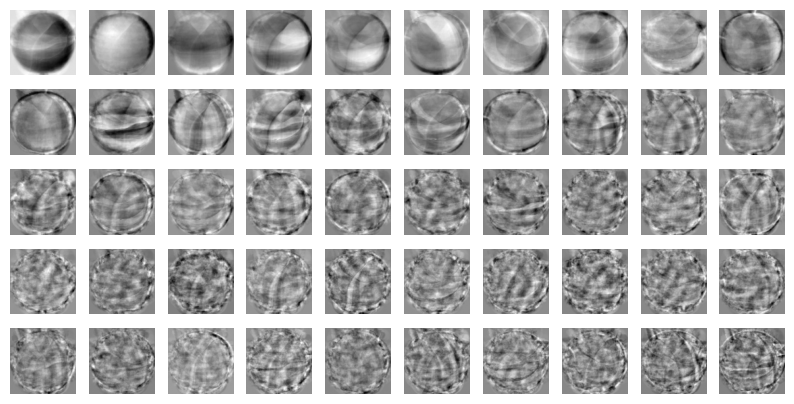

In [6]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

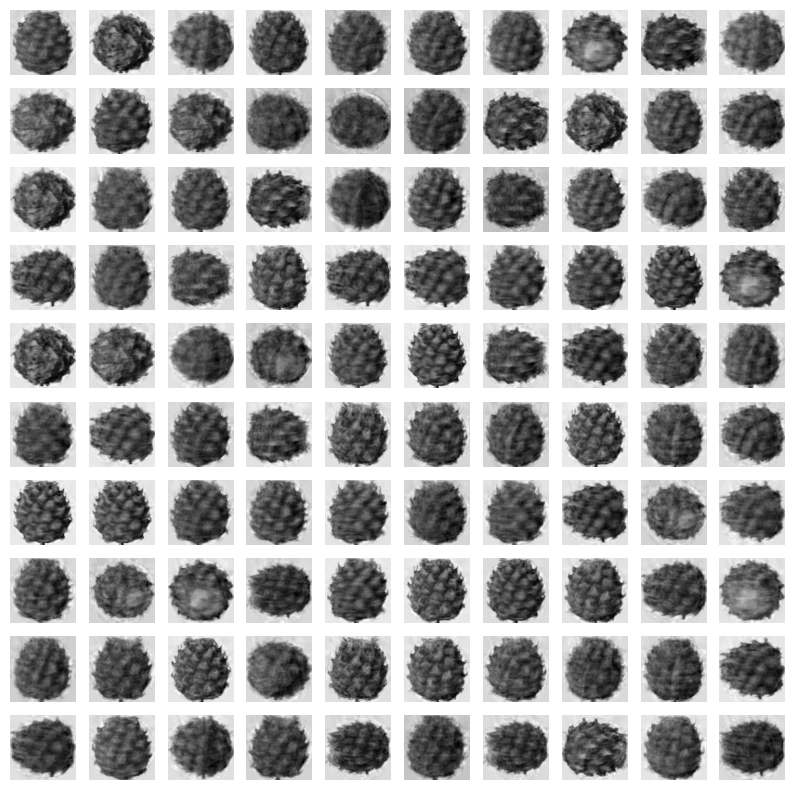

In [9]:
# 압축데이터->원본데이터
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[100:200])

In [12]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9214932145428661)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [16]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.15286422, 0.13234878, 0.12686062, 0.13926744, 0.1355691 ]), 'score_time': array([0.00189471, 0.00177383, 0.00182533, 0.00176668, 0.00173855]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00724053, 0.00777173, 0.00679421, 0.00628233, 0.01034307]), 'score_time': array([0.00050592, 0.00056005, 0.00043631, 0.00044632, 0.00044179]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [20]:
# 더 적은 데이터를 사용하여 학습
pca = PCA(n_components = 0.5) # 설명된 분산의 50%에 달하는 주성분을 찾도록
pca.fit(fruits_2d)
pca.n_components_ # 2개의 특성만으로 원본 데이터의 분산의 50% 표현

np.int64(2)

In [22]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape 

(300, 2)

In [24]:
scores= cross_validate(lr, fruits_pca,target)
scores

C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-15\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.02684426, 0.0219717 , 0.01885223, 0.01100492, 0.01999021]),
 'score_time': array([0.00057721, 0.00050545, 0.00050187, 0.00049543, 0.00046158]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

In [25]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [26]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

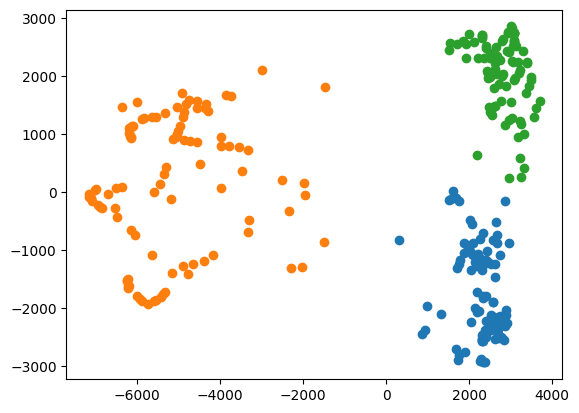

In [28]:
for label in range(3): 
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])